In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\Rishab Saini\Downloads\penguins.csv")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [5]:
df.sex.isnull().sum()

11

In [6]:
pen_total = df.groupby('island')['species'].count().reset_index()
pen_total

,island,species
0,Biscoe,168
1,Dream,124
2,Torgersen,52


In [17]:
df=df.dropna()

In [18]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
x=pd.get_dummies(df.drop("species",axis=1),drop_first=True)

In [21]:
x.shape

(333, 7)

In [23]:
y=df['species']

In [24]:
y.shape

(333,)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=80)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest=RandomForestClassifier(n_estimators=10, max_features='auto',random_state=101)
forest.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=101)

In [31]:
preds=forest.predict(x_test)

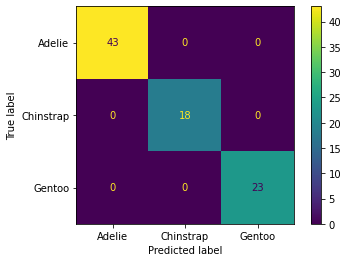

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_estimator(forest,x_test,y_test)